In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
city_data_df=pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
ride_data_df=pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [6]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [7]:
city_data_df["driver_count"].dtypes

dtype('int64')

In [8]:
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
sum(city_data_df["type"]=="Urban")

66

In [10]:
sum(city_data_df["type"]=="Suburban")

36

In [11]:
sum(city_data_df["type"]=="Rural")

18

In [12]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [13]:
new_df=pd.merge(ride_data_df,city_data_df,how="left",on="city")
new_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [14]:
urban_cities_df=new_df[new_df["type"]=="Urban"]

urban_avg_fare=urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare

city
Amandaburgh            24.641667
Barajasview            25.332273
Carriemouth            28.314444
Christopherfurt        24.501852
Deanville              25.842632
                         ...    
West Patrickchester    28.233125
West Robert            25.123871
West Samuelburgh       21.767600
Williamsstad           24.362174
Williamsview           26.599000
Name: fare, Length: 66, dtype: float64

In [15]:
suburban_cities_df=new_df[new_df["type"]=="Suburban"]
suburban_avg_fare=suburban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare

city
Barronchester         36.422500
Bethanyland           32.956111
Brandonfort           35.437368
Colemanland           30.894545
Davidfurt             31.995882
East Aaronbury        25.661111
East Danielview       31.560588
East Kentstad         29.823077
East Marymouth        30.835185
Grayville             27.763333
Josephside            32.858148
Lake Ann              30.890000
Lake Omar             28.075000
Lake Robertside       31.262000
Lake Scott            31.886111
Lewishaven            25.241667
Lewisland             34.614118
Mezachester           30.760000
Myersshire            30.203125
New Olivia            34.054118
New Raymond           27.961818
New Shannonberg       28.378235
Nicolechester         30.909474
North Jeffrey         29.242308
North Richardhaven    24.704286
North Timothy         31.262000
Port Shane            31.077895
Rodriguezview         30.745333
Sotoville             31.980000
South Brenda          33.964583
South Teresa          31.220455
Ver

In [16]:
Rural_cities_df=new_df[new_df["type"]=="Rural"]
Rural_avg_fare=Rural_cities_df.groupby(["city"]).mean()["fare"]
Rural_avg_fare

city
Bradshawfurt         40.064000
Garzaport            24.123333
Harringtonfort       33.470000
Jessicaport          36.013333
Lake Jamie           34.358333
Lake Latoyabury      26.061818
Michaelberg          34.997500
New Ryantown         43.278333
Newtonview           36.745000
North Holly          29.130000
North Jaime          30.802500
Penaborough          35.246000
Randallchester       29.742000
South Jennifer       35.264286
South Marychester    41.870000
South Saramouth      36.160000
Taylorhaven          42.263333
West Heather         33.890000
Name: fare, dtype: float64

In [17]:
urban_count_rides=urban_cities_df.groupby(["city"]).count()["fare"]

In [18]:
suburban_count_rides=suburban_cities_df.groupby(["city"]).count()["fare"]

In [19]:
Rural_count_rides=Rural_cities_df.groupby(["city"]).count()["fare"]

In [20]:
Rural_avg_diver=Rural_cities_df.groupby(["city"]).mean()["driver_count"]
Rural_avg_diver

city
Bradshawfurt         7.0
Garzaport            7.0
Harringtonfort       4.0
Jessicaport          1.0
Lake Jamie           4.0
Lake Latoyabury      2.0
Michaelberg          6.0
New Ryantown         2.0
Newtonview           1.0
North Holly          8.0
North Jaime          1.0
Penaborough          6.0
Randallchester       9.0
South Jennifer       7.0
South Marychester    1.0
South Saramouth      7.0
Taylorhaven          1.0
West Heather         4.0
Name: driver_count, dtype: float64

In [21]:
urban_avg_driver=urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_avg_driver

city
Amandaburgh            12.0
Barajasview            26.0
Carriemouth            52.0
Christopherfurt        41.0
Deanville              49.0
                       ... 
West Patrickchester    25.0
West Robert            39.0
West Samuelburgh       73.0
Williamsstad           59.0
Williamsview           46.0
Name: driver_count, Length: 66, dtype: float64

In [22]:
suburban_avg_drive=suburban_cities_df.groupby(["city"]).mean()["driver_count"]

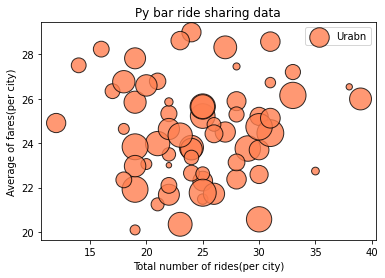

In [23]:
plt.scatter(urban_count_rides,urban_avg_fare,s=10*urban_avg_driver, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8,label="Urabn")
plt.title("Py bar ride sharing data")
plt.xlabel("Total number of rides(per city)")
plt.ylabel("Average of fares(per city)")
plt.legend()

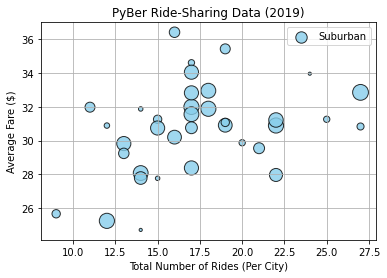

In [24]:
plt.scatter(suburban_count_rides,
      suburban_avg_fare,
      s=10*suburban_avg_drive, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

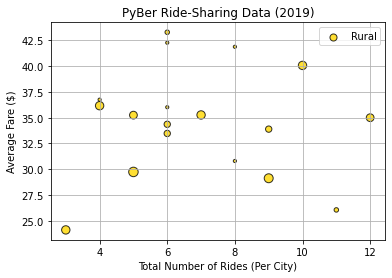

In [25]:
plt.scatter(Rural_count_rides,
      Rural_avg_fare,
      s=10*Rural_avg_diver, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

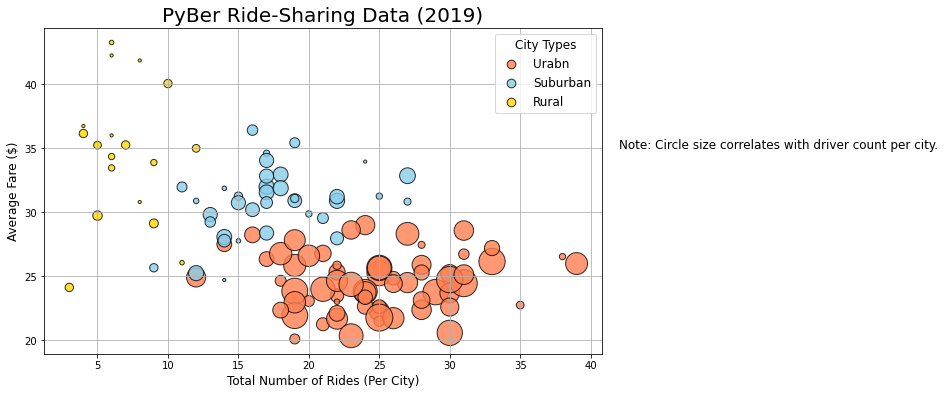

In [34]:
plt.subplots(figsize=(10, 6))
plt.scatter(urban_count_rides,urban_avg_fare,s=10*urban_avg_driver, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8,label="Urabn")

plt.scatter(suburban_count_rides,
      suburban_avg_fare,
      s=10*suburban_avg_drive, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(Rural_count_rides,
      Rural_avg_fare,
      s=10*Rural_avg_diver, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
plt.savefig("analysis/Fig1.png")
plt.show()

In [35]:
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [36]:
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [38]:
suburban_avg_drive.describe()

count    36.000000
mean     13.611111
std       8.022389
min       1.000000
25%       6.500000
50%      15.000000
75%      20.250000
max      25.000000
Name: driver_count, dtype: float64

In [39]:
Rural_count_rides.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: fare, dtype: float64

In [42]:
# Calculate the mean of the ride count for each city type.
round(urban_count_rides.mean(),2), round(suburban_count_rides.mean(),2), round(Rural_count_rides.mean(),2)

(24.62, 17.36, 6.94)

In [43]:
suburban_count_rides.mode()

0    17
dtype: int64

In [64]:
import numpy as np
import scipy.stats as sts

In [48]:
mean_urban_ride_count=np.mean(urban_count_rides)
median_urban_ride_count=np.median(urban_count_rides)
mode_urban_ride_count=sts.mode(urban_count_rides)
mean_urban_ride_count

24.62121212121212

In [50]:
urban_fares=urban_cities_df["fare"]

In [51]:
mean_urban_fares=np.mean(urban_fares)
median_urban_fares=np.median(urban_fares)
mode_urban_fares=sts.mode(urban_fares)

In [56]:
urban_drivers=urban_cities_df["driver_count"]
suburban_drivers=suburban_cities_df["driver_count"]
rural_drivers=Rural_cities_df["driver_count"]

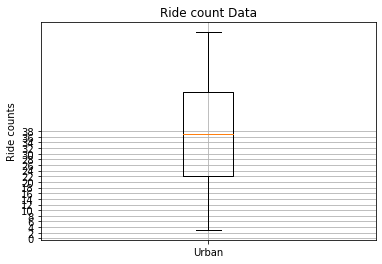

In [69]:
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)
ax.set_title("Ride count Data")
ax.set_ylabel("Ride counts")
ax.set_yticks(np.arange(0,40,step=2.0))
ax.grid()
plt.show()

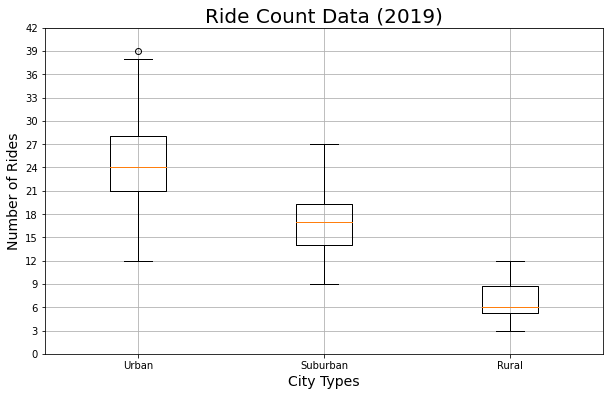

In [77]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_count_rides, suburban_count_rides, Rural_count_rides]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()


In [83]:
sum_fares_by_time=new_df.groupby(["type"]).sum()["fare"]
sum_fares_by_time

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [84]:
total_fares=new_df["fare"].sum()

In [87]:
urban_percentage_fares=sum_fares_by_time["Urban"]/total_fares*100
urban_percentage_fares

62.7246349622845

In [88]:
suburban_percentage_fares=sum_fares_by_time["Suburban"]/total_fares*100

In [89]:
rural_percentage_fares=sum_fares_by_time["Rural"]/total_fares*100

In [91]:
percentage_fares=sum_fares_by_time/total_fares*100
percentage_fares

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

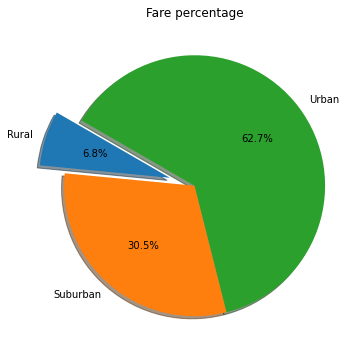

In [100]:
import matplotlib as mpl
plt.subplots(figsize=(10,6))
plt.pie(percentage_fares,labels=["Rural","Suburban","Urban"],autopct='%1.1f%%',explode=(0.2, 0, 0),shadow=True, startangle=150)
plt.title("Fare percentage")
mpl.rcParams['font.size'] = 14
plt.show()

In [ ]:
#calculate the ride percentage

In [101]:
new_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [104]:
ride_by_type=new_df.groupby(["type"]).count()["ride_id"]
ride_by_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [103]:
total_rides=new_df["ride_id"].count()

In [106]:
ride_percentage=ride_by_type/total_rides*100
ride_percentage

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

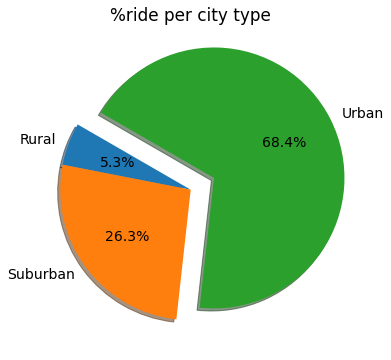

In [107]:
plt.subplots(figsize=(10,6))
plt.pie(ride_percentage, labels=["Rural","Suburban","Urban"],autopct='%1.1f%%',explode=(0, 0, 0.2),shadow=True, startangle=150 )
plt.title("%ride per city type")
mpl.rcParams['font.size'] = 14
plt.show()
